In [2]:
from IPython.core.display import display, HTML

display(HTML('<h1>MNIST</h1>'))

In [3]:
# Minst dataset consists of 70,000 small images, handwritten by high school students and 
# employees of US Census Bureau

# Fetch MINIST data
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original') 
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

In [4]:
X,y = mnist["data"], mnist["target"]

#There are 70,000 images, each image has 784 features -> Each image is 28 * 28 pixels
#Each pixel is from 0(White) to 255(Black)
X[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  51, 159, 253,
       159,  50,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  48, 238,
       252, 252, 252, 237,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [5]:
#y has numbers from 0 to 9 -> Represents the class lables
y

array([ 0.,  0.,  0., ...,  9.,  9.,  9.])

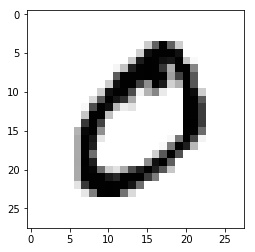

In [6]:
# To view one digit from dataset, grab an instance's feature vector, reshape it to 28 * 28
# Use Matplotlib's imshow() function

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

digit = X[0]
digit_image = digit.reshape(28,28)

plt.imshow(digit_image, cmap = matplotlib.cm.binary, interpolation = "nearest")

In [7]:
y[0]

0.0

In [8]:
#MNIST dataset is already split into train and test set. 
#MNIST dataset is already split into training and test dataset , first 60000 for training
#and the rest for testing
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [9]:
#The dataset has to be shuffled so that all cross - validation folds will not be similar 
#i.e. we do not want one fold to be missing some digits

import numpy as np

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]


In [10]:
display(HTML('<h1>Training A Binary Classifier</h1>'))

In [11]:
#5-detector, distinguishing between just two classes, 5 and not-5

#True for all 5's, and false for other 5's
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [12]:
#Stochastic Gradient Descent(SGD) classifier:

from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42,max_iter=1000)
sgd_clf.fit(X_train,y_train_5)

sgd_clf.predict([X_test[0]])

array([False], dtype=bool)

In [13]:
display(HTML('<h1>Performance Measures</h1>'))
display(HTML('<h3>1. Measure accuracy using Cross-Validation</h3>'))

In [14]:
#Implementing StratifiedKFold

from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
skfolds = StratifiedKFold(n_splits=3, random_state = 42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_folds = X_train[test_index]
    y_test_folds = y_train_5[test_index]
    
    clone_clf.fit(X_train_folds,y_train_folds)
    y_pred  = clone_clf.predict(X_test_folds)
    n_correct = sum(y_pred == y_test_folds)
    
    print(n_correct/len(y_pred))    

0.95805
0.96745
0.9653


In [15]:
#Using cross_val_score()
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train,y_train,cv = 3,scoring="accuracy")


array([ 0.86157768,  0.87139357,  0.8540281 ])

In [16]:
#Though the accuracy is >90%, we cannot say the model is always right because 
#even a dumb classifier would give good results
#This is because only 10% of the data has class 5 and even if the model predics wrong
#class, the accuracy will always be 90% 

In [17]:
from sklearn.base import BaseEstimator

#np.zeros((5,1), dtype=bool)
#np.ones((5,1), dtype=bool)

class Never5Classifier(BaseEstimator):
    def fit(self,X,y=None):
        pass
    
    def predict(self,X):
        return np.zeros((len(X),1),dtype=bool)

#Guessing the models accuracy with the ablove class

never_5_clf = Never5Classifier()
cross_val_score(never_5_clf,X_train,y_train_5,cv=3,scoring="accuracy")

array([ 0.90845,  0.9083 ,  0.9122 ])

In [18]:
display(HTML('<h1>Confusiion Matrix</h1>'))

In [ ]:
# The above method also gives an accuracy > 90%. So its not always prefferred to 
# use accuracy as a preformance measure. So we go for Confusion Matrix

In [23]:
#Using cross_val_predict() to predict values -> 
#To avoid using test data as of now for confusion matrix

from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
y_train_pred

array([False, False, False, ..., False, False,  True], dtype=bool)

In [36]:
#To find the confusion matrix
print(y_train_pred.shape)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)


(60000,)


array([[53020,  1559],
       [ 1055,  4366]])

In [20]:
display(HTML('<h1>Precision and Recall</h1>'))

In [27]:
#Precision score
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.84784010315925207

In [28]:


#Recall Score
from sklearn.metrics import precision_score, recall_score

recall_score(y_train_5, y_train_pred)

0.7277255118981738

In [26]:
#Computing F1 Score
from sklearn.metrics import f1_score

f1_score(y_train_5,y_train_pred)

0.78320428826682542

In [34]:
#Decision threshold and precision/recall tradeoff
#It returns a score for each instance, and makes predictions based on those scores using 
#any threshold we want

y_scores = sgd_clf.decision_function(X)
y_scores

array([-2099.51290664, -1070.69786974, -1602.54001457, ..., -1985.03281273,
       -2248.15026516, -3191.99171687])

In [40]:
#Now the threshold is set to 0, and then predictions are made
threshold = 0
y_some_digit_pred = y_scores>threshold
y_some_digit_pred

array([False, False, False, ..., False, False, False], dtype=bool)

In [ ]:
#Lowering the threshold increses the recall and reduces precision
#Increasing the threshold decreases the recall and increases precision

In [41]:
threshold = -2000
y_some_digit_pred = y_scores>threshold
y_some_digit_pred

array([False,  True,  True, ...,  True, False, False], dtype=bool)

In [ ]:
#In the above case recall is increased, but precision is decreased(So with this 
#threshold, the precision will be decreased since all wil not be
# 5's above theshold -2000, but the recall increase)

In [43]:
#To decide which threshold to use, use decision score in method instead of accuracy to 
# first find scores of all instances in training set
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method = "decision_function")

In [44]:
y_scores

array([[    0.        , -2867.27341017],
       [    0.        , -4122.83205259],
       [    0.        , -4005.1177425 ],
       ..., 
       [    0.        , -1711.72758147],
       [    0.        ,  -765.36096697],
       [    0.        ,   746.05078552]])

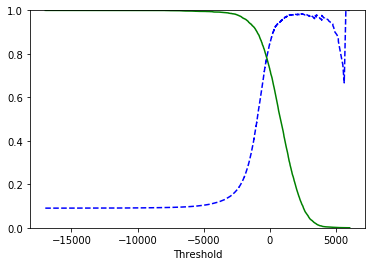

In [74]:
#Calclate recalls, precisions for all possible thresholds using the above score and
#precision recall curve function
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5,y_scores[:,1:2])


#Plot precision and recall against density function
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--",label = "Recisions")
    plt.plot(thresholds, recalls[:-1], "g-", label = "Recall")
    plt.xlabel("Threshold")
    plt.ylim([0,1])
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)  
plt.show()

In [ ]:
# Now we have to select the threshold which gives the best precision or recall
